Found 485 files belonging to 2 classes.
Using 388 files for training.
Found 485 files belonging to 2 classes.
Using 97 files for validation.


/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_33017/4054244407.py:37: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(180, 180, 3),


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 6, 6, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - accuracy: 0.5627 - loss: 0.9639 - val_accuracy: 0.5464 - val_loss: 0.7229
Epoch 2/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.5925 - loss: 0.7233 - val_accuracy: 0.6289 - val_loss: 0.6596
Epoch 3/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.6818 - loss: 0.6016 - val_accuracy: 0.6082 - val_loss: 0.7267
Epoch 4/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.6791 - loss: 0.5979 - val_accuracy: 0.6701 - val_loss: 0.6175
Epoch 5/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.7692 - loss: 0.5005 - val_accuracy: 0.6701 - val_loss: 0.5945
Epoch 6/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 0.7748 - loss: 0.4843 - val_accuracy: 0.7010 - val_loss: 0.6063
Epoch 7/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.7805 - loss: 0.4315 - val_accuracy: 0.7113 - val_loss: 0.6169
Epoch 8/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.8110 - loss: 0.4078 - val_accuracy: 0.

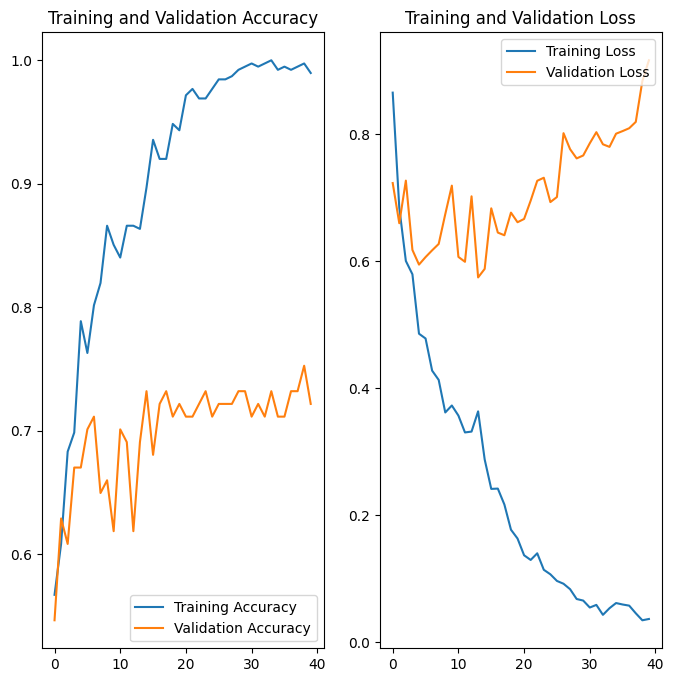

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

data_dir = "./data/"

# Training split
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(180, 180),
    batch_size=32)

# Testing or Validation split
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(180,180),
    batch_size=32)


# Creating the model
class_names = train_ds.class_names

num_classes = len(class_names)

# Load the MobileNetV2 model pre-trained on ImageNet, excluding the top layer
base_model = MobileNetV2(input_shape=(180, 180, 3),
                         include_top=False,
                         weights='imagenet')

# Freeze the base model to retain pre-trained weights
base_model.trainable = False

# Create a new model with a custom classification head
model = models.Sequential([
    base_model,  # Base model (pre-trained)
    layers.GlobalAveragePooling2D(),  # Convert features to a single vector
    layers.Dense(128, activation='relu'),  # Add a dense layer
    layers.Dropout(0.3),  # Add dropout to reduce overfitting
    layers.Dense(num_classes, activation='softmax')  # Final classification layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
epochs = 40
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Plotting results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# get predictions for the validation set
val_image_batch, val_label_batch = next(iter(val_ds))
true_label_ids = val_label_batch
print("Validation batch shape:", val_image_batch.shape)

tf_model_predictions = model.predict(val_image_batch)
tf_pred_dataframe = tf_model_predictions

In [4]:
# predicting on all images in the data folder
# create a dataframe with the image name and the predicted class
import pandas as pd
from tensorflow.keras.preprocessing import image

# data directory contains /data/Alex and /data/Kelly

# create a list of all images in both folders
data_dir = './data'
images = []
for folder in os.listdir(data_dir):
    for filename in os.listdir(os.path.join(data_dir, folder)):
        if filename.endswith('.png'):
            images.append(os.path.join(data_dir, folder, filename))

# create a dataframe with the image name and the predicted class

results = []

for img_path in images:
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    results.append({'image': img_path, 'predicted_class': predicted_class})

results_df = pd.DataFrame(results)
results_df.head()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━

image predicted_class
0  ./data/Alex/Alex-Image119.png            Alex
1  ./data/Alex/Alex-Image131.png            Alex
2  ./data/Alex/Alex-Image125.png            Alex
3  ./data/Alex/Alex-Image247.png            Alex
4   ./data/Alex/Alex-Image27.png            Alex

In [24]:
# remove the ./data/Alex/ and ./data/Kelly/ from the image column
# also remove the .png extension
results_df['image'] = results_df['image'].str.replace('./data/Alex/', '')
results_df['image'] = results_df['image'].str.replace('./data/Kelly/', '')
results_df['image'] = results_df['image'].str.replace('.png', '')

results_df.head()


image predicted_class
242  Alex-Image01            Alex
252  Alex-Image02           Kelly
249  Alex-Image03            Alex
230  Alex-Image04            Alex
229  Alex-Image05            Alex

In [ ]:
# read in csv file with other features and join with the results dataframe on the image column
features = pd.read_csv('./phase2.csv')
features.head()

image  urban  board_games  water/snow  people  landscape  blurry  \
0  Alex-Image01      1            0           0       1          0       1   
1  Alex-Image02      1            0           0       1          0       1   
2  Alex-Image03      1            0           0       0          0       0   
3  Alex-Image04      1            0           1       0          0       1   
4  Alex-Image05      1            0           1       0          0       0   

   high_angle  light  symmetry  leading_lines  
0           1      1         0              0  
1           1      1         1              1  
2           1      0         0              0  
3           0      1         0              1  
4           0      1         0              0

In [ ]:
# join the two dataframes
final_df = pd.merge(features, results_df, on='image')
final_df.head()

image  urban  board_games  water/snow  people  landscape  blurry  \
0  Alex-Image01      1            0           0       1          0       1   
1  Alex-Image02      1            0           0       1          0       1   
2  Alex-Image03      1            0           0       0          0       0   
3  Alex-Image04      1            0           1       0          0       1   
4  Alex-Image05      1            0           1       0          0       0   

   high_angle  light  symmetry  leading_lines predicted_class  
0           1      1         0              0            Alex  
1           1      1         1              1           Kelly  
2           1      0         0              0            Alex  
3           0      1         0              1            Alex  
4           0      1         0              0            Alex

In [29]:
# save the dataframe to a csv file
final_df.to_csv('predictions.csv', index=False)

In [5]:
# make predictions on new images contained in the test folder
# test folder contains TestSet01 and TestSet02 folders

# list of images for test set 1
test_set_1 = []
for filename in os.listdir('./test/TestSet01'):
    if filename.endswith('.png'):
        test_set_1.append(os.path.join('./test/TestSet01', filename))

# list of images for test set 2
test_set_2 = []
for filename in os.listdir('./test/TestSet02'):
    if filename.endswith('.png'):
        test_set_2.append(os.path.join('./test/TestSet02', filename))

# create a dataframe with the image name and the predicted class for test set 1
results_test_set_1 = []

for img_path in test_set_1:
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    results_test_set_1.append({'image': img_path, 'predicted_class': predicted_class})

results_test_set_1_df = pd.DataFrame(results_test_set_1)

# remove the ./test/TestSet01/ from the image column
# also remove the .png extension
results_test_set_1_df['image'] = results_test_set_1_df['image'].str.replace('./test/TestSet01/', '')
results_test_set_1_df['image'] = results_test_set_1_df['image'].str.replace('.png', '')

# create a dataframe with the image name and the predicted class for test set 2
results_test_set_2 = []

for img_path in test_set_2:
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    results_test_set_2.append({'image': img_path, 'predicted_class': predicted_class})

results_test_set_2_df = pd.DataFrame(results_test_set_2)

# remove the ./test/TestSet02/ from the image column
# also remove the .png extension
results_test_set_2_df['image'] = results_test_set_2_df['image'].str.replace('./test/TestSet02/', '')
results_test_set_2_df['image'] = results_test_set_2_df['image'].str.replace('.png', '')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

In [14]:
#  get all predicted_class = Alex
print(results_test_set_1_df[results_test_set_1_df['predicted_class'] == 'Alex'])

# get all predicted_class = Kelly
print(results_test_set_1_df[results_test_set_1_df['predicted_class'] == 'Kelly'])

             image predicted_class
4   TestSetImage02            Alex
5   TestSetImage03            Alex
9   TestSetImage06            Alex
10  TestSetImage12            Alex
13  TestSetImage11            Alex
17  TestSetImage09            Alex
18  TestSetImage19            Alex
19  TestSetImage18            Alex
             image predicted_class
0   TestSetImage01           Kelly
1   TestSetImage15           Kelly
2   TestSetImage14           Kelly
3   TestSetImage16           Kelly
6   TestSetImage17           Kelly
7   TestSetImage13           Kelly
8   TestSetImage07           Kelly
11  TestSetImage04           Kelly
12  TestSetImage10           Kelly
14  TestSetImage05           Kelly
15  TestSetImage08           Kelly
16  TestSetImage20           Kelly


In [15]:
# get all predicted_class = Alex
print(results_test_set_2_df[results_test_set_2_df['predicted_class'] == 'Alex'])

# get all predicted_class = Kelly
print(results_test_set_2_df[results_test_set_2_df['predicted_class'] == 'Kelly'])

                image predicted_class
1   TestSet02-Image12            Alex
3   TestSet02-Image07            Alex
4   TestSet02-Image11            Alex
9   TestSet02-Image01            Alex
10  TestSet02-Image15            Alex
12  TestSet02-Image17            Alex
15  TestSet02-Image18            Alex
16  TestSet02-Image24            Alex
22  TestSet02-Image22            Alex
                image predicted_class
0   TestSet02-Image06           Kelly
2   TestSet02-Image13           Kelly
5   TestSet02-Image05           Kelly
6   TestSet02-Image04           Kelly
7   TestSet02-Image10           Kelly
8   TestSet02-Image14           Kelly
11  TestSet02-Image03           Kelly
13  TestSet02-Image16           Kelly
14  TestSet02-Image02           Kelly
17  TestSet02-Image19           Kelly
18  TestSet02-Image21           Kelly
19  TestSet02-Image09           Kelly
20  TestSet02-Image08           Kelly
21  TestSet02-Image20           Kelly
23  TestSet02-Image23           Kelly
